In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [4]:
tempMax = xr.open_dataset("/home/mlopez/EXEC/Données test/tasmax_day_BNU-ESM_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1956.nc")

In [5]:
tempMax

<xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 ...
    tasmax        (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.

In [61]:
set(tempMax.ts.values)

{nan, nan, nan}

In [47]:
LatSize = tempMax.lat.size
LatSize


700

In [48]:
LonSize = tempMax.lon.size
LonSize

1064

In [77]:
#Not useful, tasmax is all NAN and data is not well distributed. Process is more complex. 
#Make same as R, first, transform into vector and matrix, then DF
df = tempMax.to_dataframe().dropna()
df


time_vectors      tasmax
lat       lon        time                ts                           
66.623306 -89.045212 1956-01-01 00:00:00 NaN          1956  240.807495
                                         NaN             1  240.807495
                                         NaN             1  240.807495
                     1956-01-02 00:00:00 NaN          1956  242.874939
                                         NaN             1  242.874939
...                                                    ...         ...
40.041039 -74.045807 1956-12-30 00:00:00 NaN            12  284.645111
                                         NaN            30  284.645111
                     1956-12-31 00:00:00 NaN          1956  282.990845
                                         NaN            12  282.990845
                                         NaN            31  282.990845

[83445570 rows x 2 columns]

In [83]:
AllcoordTempMean = df.groupby("time").mean()
AllcoordTempMean

,time_vectors,tasmax
time,,
1956-01-01 00:00:00,652.666667,261.011810
1956-01-02 00:00:00,653.000000,263.771912
1956-01-03 00:00:00,653.333333,264.666656
1956-01-04 00:00:00,653.666667,263.498505
1956-01-05 00:00:00,654.000000,261.698914
...,...,...
1956-12-27 00:00:00,665.000000,263.063080
1956-12-28 00:00:00,665.333333,267.987579
1956-12-29 00:00:00,665.666667,269.903564


In [84]:
TempMeanC = AllcoordTempMean
TempMeanC["tasmaxC"] = TempMeanC["tasmax"] -273.15
TempMeanC


,time_vectors,tasmax,tasmaxC
time,,,
1956-01-01 00:00:00,652.666667,261.011810,-12.138184
1956-01-02 00:00:00,653.000000,263.771912,-9.378082
1956-01-03 00:00:00,653.333333,264.666656,-8.483337
1956-01-04 00:00:00,653.666667,263.498505,-9.651489
1956-01-05 00:00:00,654.000000,261.698914,-11.451080
...,...,...,...
1956-12-27 00:00:00,665.000000,263.063080,-10.086914
1956-12-28 00:00:00,665.333333,267.987579,-5.162415
1956-12-29 00:00:00,665.666667,269.903564,-3.246429


NameError: name 'mpatches' is not defined

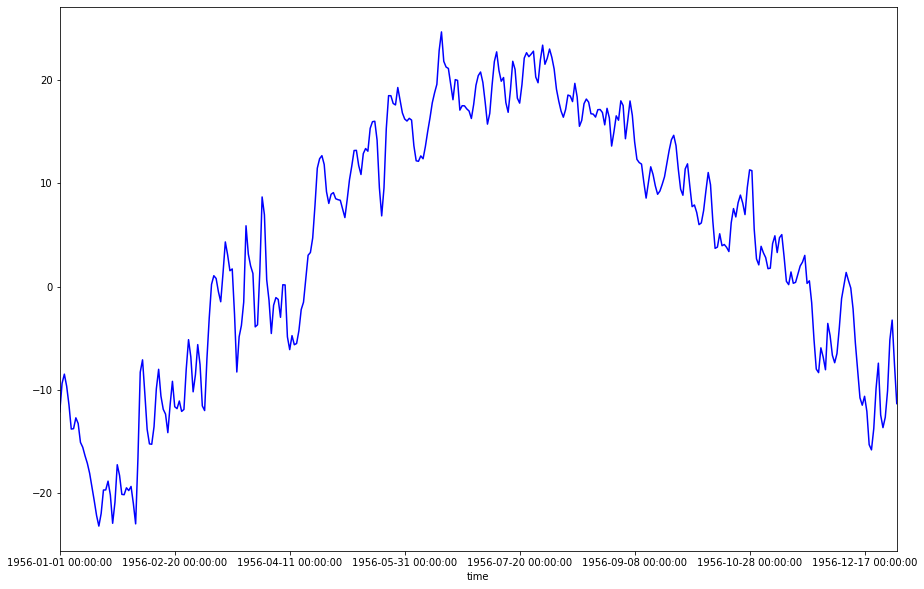

In [85]:
# plot time series
TempMeanC['tasmaxC'].plot.line('o-',color='blue',figsize=(15,10))

# add colour reference
blue_patch = mpatches.Patch(color='blue', label='Temperature Maximale')
plt.legend(handles=[blue_patch,])

# add titles
plt.x('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Maximale')


In [51]:
lon = tempMax.variables['lon'][:]
lon

<xarray.IndexVariable 'lon' (lon: 1064)>
array([-141.04314, -140.9598 , -140.87646, ...,  -52.63   ,  -52.54667,
        -52.46334], dtype=float32)
Attributes:
    axis:           X
    units:          degrees_east
    long_name:      longitude
    standard_name:  longitude

In [52]:
lat = tempMax.variables['lat'][:]
lat

<xarray.IndexVariable 'lat' (lat: 700)>
array([83.28931, 83.20598, 83.12265, ..., 25.2083 , 25.12497, 25.04164],
      dtype=float32)
Attributes:
    axis:           Y
    units:          degrees_north
    long_name:      latitude
    standard_name:  latitude

In [53]:
tasmax = tempMax.variables['tasmax'][:]
time = tempMax.variables['time']
time


<xarray.IndexVariable 'time' (time: 365)>
array([cftime.DatetimeNoLeap(1956-01-01 00:00:00),
       cftime.DatetimeNoLeap(1956-01-02 00:00:00),
       cftime.DatetimeNoLeap(1956-01-03 00:00:00), ...,
       cftime.DatetimeNoLeap(1956-12-29 00:00:00),
       cftime.DatetimeNoLeap(1956-12-30 00:00:00),
       cftime.DatetimeNoLeap(1956-12-31 00:00:00)], dtype=object)
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time

In [54]:
tasmax

<xarray.Variable (time: 365, lat: 700, lon: 1064)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Attributes:
    units:          K
    long_name:      air_temperature
    standard_name:  air_temperature

In [6]:
tempMax.variables

Frozen({'ts': <xarray.IndexVariable 'ts' (ts: 3)>
array([nan, nan, nan], dtype=float32), 'time': <xarray.IndexVariable 'time' (time: 365)>
array([cftime.DatetimeNoLeap(1956-01-01 00:00:00),
       cftime.DatetimeNoLeap(1956-01-02 00:00:00),
       cftime.DatetimeNoLeap(1956-01-03 00:00:00), ...,
       cftime.DatetimeNoLeap(1956-12-29 00:00:00),
       cftime.DatetimeNoLeap(1956-12-30 00:00:00),
       cftime.DatetimeNoLeap(1956-12-31 00:00:00)], dtype=object)
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time, 'time_vectors': <xarray.Variable (time: 365, ts: 3)>
array([[1956,    1,    1],
       [1956,    1,    2],
       [1956,    1,    3],
       ...,
       [1956,   12,   29],
       [1956,   12,   30],
       [1956,   12,   31]], dtype=int32), 'lat': <xarray.IndexVariable 'lat' (lat: 700)>
array([83.28931, 83.20598, 83.12265, ..., 25.2083 , 25.12497, 25.04164],
      dtype=float32)
Attributes:
    axis:           Y
    units:          degrees_north

In [7]:
tempMax.values 

<bound method Mapping.values of <xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 1956 1 1 1956 1 2 ... 1956 12 30 1956 12 31
    tasmax        (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.>

In [8]:
tempMax.dims

Frozen(SortedKeysDict({'ts': 3, 'time': 365, 'lat': 700, 'lon': 1064}))

In [9]:
tempMax.coords

Coordinates:
  * ts       (ts) float32 nan nan nan
  * time     (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334

In [10]:
tempMax.attrs

{'Conventions': 'CF-1.5',
 'title': 'BNU-ESM model output prepared for CMIP5 historical',
 'history': '2012-03-12T06:02:50Z CMOR rewrote data to comply with CF standards and CMIP5 requirements.\n2016-01-18T22:18:22: Interpolate to nrcan_livneh grid.\n2016-02-10T09:50:01: Bias correction using nrcan_livneh.',
 'institution': 'GCESS,BNU,Beijing,China',
 'source': 'BNU-ESM\n30-day moving window 50-bins quantile mapping with detrending.',
 'redistribution': 'Redistribution prohibited. For internal use only.'}

In [13]:
# Extract Temperature 
# Select nearest
# Drop NaN, convert to Celcius
da = tempMax.tasmax.sel(method='nearest').dropna(dim='time') - 273.15  # or .ffill(dim='time')

In [14]:
da

<xarray.DataArray 'tasmax' (time: 0, lat: 700, lon: 1064)>
array([], shape=(0, 700, 1064), dtype=float32)
Coordinates:
  * time     (time) object 
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334

In [20]:
da1 = tempMax.tasmax.sel(time=slice('1956-01-01', '1956-12-31')) - 273.15 
da1

<xarray.DataArray 'tasmax' (time: 365, lat: 700, lon: 1064)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334

In [32]:
da1.

<xarray.DataArray 'tasmax' (time: 365, lat: 700, lon: 1064)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334

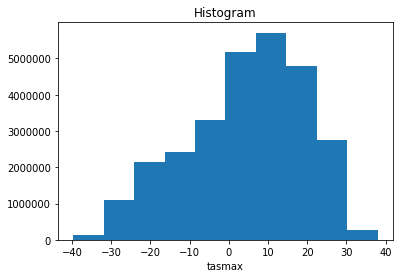

In [33]:
da1.plot()
plt.show()

In [34]:
da_numpy = tempMax.values
da_numpy

<bound method Mapping.values of <xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 1956 1 1 1956 1 2 ... 1956 12 30 1956 12 31
    tasmax        (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.>